#Test from Research Paper for The Jumping Spiders Team

Following the techniques for text-segmentation and parsing developed in [*Utilizing Artificial Intelligence for Text Segmentation from Images*](https://web.p.ebscohost.com/ehost/pdfviewer/pdfviewer?vid=0&sid=0531eae4-3f69-483c-b4a5-b8f728de4b78%40redis), I hope to find an effective way to preprocess, train, and test the model while yeilding high success rates.

> These tests were conducted by Alexia Rangel K.

---


# Data Collection and Input
Just used images that were collected from the Lepidorma library and had legible machine text



In [2]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext/
%ldir

/content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext
drwx------ 2 root      4096 Feb 10 21:32 Butterflies/
drwx------ 2 root      4096 Feb 11 01:13 train_images/


In [4]:
import pandas as pd #Dataframe stuff
import tensorflow as tf #Tensorflow is a machine learning dataset used for building Neural Nets
import os #Used to navigate through file structures
import cv2 as cv
from matplotlib import pyplot as plt

In [5]:
butterfly_dir = 'Butterflies'
train_dir = 'train_images'

In [6]:
butterfly_df = pd.read_csv("TJS-Test3-ExactGeoInfo.csv")
butterfly_df

,Image_Path,Correct_Text
0,MGCL 1169103,"USA: Arizona Graham Co. Mt. Graham 10,000 ft. ..."
1,MGCL 1167602,"P. s. marcellina June 28, 1969 Brownsville, Te..."
2,MGCL 1167603,P. e sannae Bentsen-Rio Grande State Park Hida...
3,MGCL 1168927,ARIZ: Santa Cruz Co. Sycamore Canyon 2-IX-77 l...
4,MGCL 1152779,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...
5,MGCL 1152780,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...
6,MGCL 1165517,"MEXICO: Chiapas, Ocozocoautla September 1948 E..."
7,MGCL 1165803,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...
8,MGCL 1165810,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...
9,MGCL 1165809,MEXICO: Veracruz Presidió August 1953 Ex. K. H...


In [7]:
train_df = pd.read_csv("annot.csv")
train_df.head(5)

,Unnamed: 0,id,image_id,bbox,utf8_string,points,area
0,0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69
2,2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,"[626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...",3071.27
3,3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,"[580.02, 143.61, 724.53, 141.87, 723.66, 184.9...",6341.30
4,4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,"[395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...",2350.69


In [8]:
train_df.drop(columns=["Unnamed: 0", "points", "area"], axis=1, inplace=True)
train_df.head(5)

,id,image_id,bbox,utf8_string
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.


In [9]:
def checkExt (data_dir):
  #Quick Reviewing the Extensions
  count = 0;
  for image in os.listdir(data_dir):
    #For each image in the tjs directory
    image_path = os.path.join(data_dir, image)
    count = count + 1
    try:
      img = cv.imread(image_path)
      ext = image_path.lower().endswith(('.jpg', '.jpeg'))    #ISSUE HERE FOR SOME REASON
      if not ext:
        print('Image not in ext list {}'.format(image_path))
    except Exception as e:
      print('Issue with image {}, {}'.format(image_path, e))
  print('Counted', count, 'images')

In [10]:
#checkExt(butterfly_dir)

In [11]:
#checkExt(train_dir)

In [13]:
image_files = sorted(os.listdir(butterfly_dir))
butterfly_df_imagePath = butterfly_df.sort_values(by='Image_Path')
butterfly_df_imagePath.reset_index(drop=True, inplace=True)
butterfly_df_imagePath['image_path'] = [os.path.join(butterfly_dir, img) for img in image_files]
print(butterfly_df_imagePath.head());

     Image_Path                                       Correct_Text  \
0  MGCL 1152779  FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...   
1  MGCL 1152780  FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...   
2  MGCL 1165517  MEXICO: Chiapas, Ocozocoautla September 1948 E...   
3  MGCL 1165803  MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...   
4  MGCL 1165804  MEXICO: Guerrero Acahuizotla Sep 1955 Ex. K. H...   

                     image_path  
0  Butterflies/MGCL 1152779.jpg  
1  Butterflies/MGCL 1152780.jpg  
2  Butterflies/MGCL 1165517.jpg  
3  Butterflies/MGCL 1165803.jpg  
4  Butterflies/MGCL 1165804.jpg  


In [26]:
image_files = sorted(os.listdir(train_dir))
train_df_imagePath = train_df
train_df_imagePath.reset_index(drop=True, inplace=True)
train_df_imagePath['image_path'] = None

for img in image_files:
  img_path = os.path.join(train_dir, img)
  img_name, ext= os.path.splitext(img)
  train_df_imagePath.loc[train_df_imagePath['image_id'] == img_name, 'image_path'] = img_path

train_df_imagePath.head(20)

,id,image_id,bbox,utf8_string,image_path
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,train_images/a4ea732cd3d5948a.jpg
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,train_images/a4ea732cd3d5948a.jpg
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,train_images/a4ea732cd3d5948a.jpg
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,train_images/a4ea732cd3d5948a.jpg
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,train_images/a4ea732cd3d5948a.jpg
5,a4ea732cd3d5948a_6,a4ea732cd3d5948a,"[455.64, 204.45, 21.97, 24.82]",400,train_images/a4ea732cd3d5948a.jpg
6,a4ea732cd3d5948a_7,a4ea732cd3d5948a,"[474.58, 234.95, 17.24, 24.25]",300,train_images/a4ea732cd3d5948a.jpg
7,a4ea732cd3d5948a_8,a4ea732cd3d5948a,"[506.48, 263.69, 25.42, 41.99]",15,train_images/a4ea732cd3d5948a.jpg
8,a4ea732cd3d5948a_9,a4ea732cd3d5948a,"[346.4, 177.05, 54.56, 38.48]",12,train_images/a4ea732cd3d5948a.jpg
9,a4ea732cd3d5948a_10,a4ea732cd3d5948a,"[364.49, 163.27, 19.82, 16.08]",60,train_images/a4ea732cd3d5948a.jpg


In [29]:
# saving the dataframe
train_df_imagePath.to_csv('annot_path.csv')

In [17]:
print(image_files[:10])

['0000599864fd15b3.jpg', '0000e8b36676338b.jpg', '00010bf498b64bab.jpg', '00012db06b98f573.jpg', '00016982f6086d39.jpg', '0001a2f47097ee27.jpg', '0001c6bf48e16ab2.jpg', '000209d575f3aa4f.jpg', '000228608388803f.jpg', '0002c799b0cd7412.jpg']


In [15]:
image_files = sorted(os.listdir(butterfly_dir))
print(image_files);

['MGCL 1152779.jpg', 'MGCL 1152780.jpg', 'MGCL 1165517.jpg', 'MGCL 1165803.jpg', 'MGCL 1165804.jpg', 'MGCL 1165805.jpg', 'MGCL 1165809.jpg', 'MGCL 1165810.jpg', 'MGCL 1165816.jpg', 'MGCL 1167602.jpg', 'MGCL 1167603.jpg', 'MGCL 1168927.jpg', 'MGCL 1169103.jpg']


#Pre-processing


*   image binarization using Otsu's method
*   image smoothing using Gaussian filter
*   image enhancement using Contrast Limited Adaptive Histogram Equalization (CLAHE) algorithm
*   crop Image





In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

In [ ]:
def cropImage(img_path):

  # Opens a image in RGB mode
  im = Image.open(img_path)

  # Size of the image in pixels (size of original image)
  # (This is not mandatory)
  width, height = im.size

  # Setting the points for cropped image
  left = 0
  top = 0
  right = 164
  bottom = height

  # Cropped image of above dimension
  # (It will not change original image)
  return im.crop((left, top, right, bottom))

In [ ]:
def imgBinarization(img_path):
  img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

  # global thresholding
  ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

  # Otsu's thresholding
  ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

  # Otsu's thresholding after Gaussian filtering
  blur = cv.GaussianBlur(img,(5,5),0)
  ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

  # plot all the images and their histograms
  images = [img, 0, th1,
            img, 0, th2,
            blur, 0, th3]
  titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding",
            'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

  for i in range(3):
      plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
      plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
      plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
      plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
      plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
      plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
newImg = cropImage("Butterflies/MGCL 1152779.jpg")

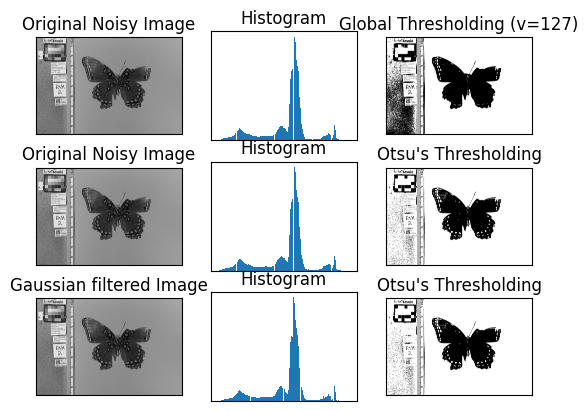

In [ ]:
imgBinarization("Butterflies/MGCL 1152779.jpg")

In [ ]:
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(256, 256))  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    return img_array

In [ ]:
butterfly_df_imageData = butterfly_df_imagePath;
butterfly_df_imageData['image_data'] = butterfly_df_imagePath['image_path'].apply(lambda x: load_and_preprocess_image(x))

In [ ]:
butterfly_df_imageData

,Image_Path,Correct_Text,image_path,image_data
0,MGCL 1152779,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...,Butterflies/MGCL 1152779.jpg,"[[[0.61960787, 0.61960787, 0.61960787], [0.623..."
1,MGCL 1152780,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...,Butterflies/MGCL 1152780.jpg,"[[[0.60784316, 0.60784316, 0.60784316], [0.615..."
2,MGCL 1165517,"MEXICO: Chiapas, Ocozocoautla September 1948 E...",Butterflies/MGCL 1165517.jpg,"[[[0.63529414, 0.63529414, 0.63529414], [0.635..."
3,MGCL 1165803,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...,Butterflies/MGCL 1165803.jpg,"[[[0.6627451, 0.6627451, 0.6627451], [0.670588..."
4,MGCL 1165804,MEXICO: Guerrero Acahuizotla Sep 1955 Ex. K. H...,Butterflies/MGCL 1165804.jpg,"[[[0.627451, 0.627451, 0.627451], [0.627451, 0..."
5,MGCL 1165805,MEXICO: Guerrero Acahuizotla Sep 1955 Ex. K. H...,Butterflies/MGCL 1165805.jpg,"[[[0.69411767, 0.6862745, 0.6901961], [0.70196..."
6,MGCL 1165809,MEXICO: Veracruz Presidió August 1953 Ex. K. H...,Butterflies/MGCL 1165809.jpg,"[[[0.62352943, 0.62352943, 0.62352943], [0.627..."
7,MGCL 1165810,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...,Butterflies/MGCL 1165810.jpg,"[[[0.6156863, 0.6156863, 0.62352943], [0.61960..."
8,MGCL 1165816,MEXICO: Guerrero Acahuizotla Sep 1955 Ex. K. H...,Butterflies/MGCL 1165816.jpg,"[[[0.59607846, 0.59607846, 0.59607846], [0.611..."
9,MGCL 1167602,"P. s. marcellina June 28, 1969 Brownsville, Te...",Butterflies/MGCL 1167602.jpg,"[[[0.69803923, 0.7058824, 0.7019608], [0.70196..."


# Text Segmentation Algorithms


# Evaluations
